<a href="https://colab.research.google.com/github/sonalisanjeevprabu18/Neural-Network-and-Deep-Learning/blob/main/Fruit_Quality_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip /content/fruit_quality.zip


Streaming output truncated to the last 5000 lines.
  inflating: Fruit_Quality/FRUIT-16K/S_Mango/101.jpg  
  inflating: Fruit_Quality/FRUIT-16K/S_Mango/102.jpg  
  inflating: Fruit_Quality/FRUIT-16K/S_Mango/103.jpg  
  inflating: Fruit_Quality/FRUIT-16K/S_Mango/104.jpg  
  inflating: Fruit_Quality/FRUIT-16K/S_Mango/105.jpg  
  inflating: Fruit_Quality/FRUIT-16K/S_Mango/106.jpg  
  inflating: Fruit_Quality/FRUIT-16K/S_Mango/107.jpg  
  inflating: Fruit_Quality/FRUIT-16K/S_Mango/108.jpg  
  inflating: Fruit_Quality/FRUIT-16K/S_Mango/109.jpg  
  inflating: Fruit_Quality/FRUIT-16K/S_Mango/11.jpg  
  inflating: Fruit_Quality/FRUIT-16K/S_Mango/110.jpg  
  inflating: Fruit_Quality/FRUIT-16K/S_Mango/111.jpg  
  inflating: Fruit_Quality/FRUIT-16K/S_Mango/112.jpg  
  inflating: Fruit_Quality/FRUIT-16K/S_Mango/113.jpg  
  inflating: Fruit_Quality/FRUIT-16K/S_Mango/114.jpg  
  inflating: Fruit_Quality/FRUIT-16K/S_Mango/115.jpg  
  inflating: Fruit_Quality/FRUIT-16K/S_Mango/116.jpg  
  inflating: Fr

In [3]:
!pip install -q ultralytics opencv-python-headless pillow matplotlib scikit-learn
print("Libraries installed.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.9 MB/s eta 0:00:00
Libraries installed.


In [5]:
from pathlib import Path

dataset_path = Path("Fruit_Quality/FRUIT-16K")
print("Dataset path =", dataset_path)
print("Subfolders:", list(dataset_path.iterdir()))


Dataset path = Fruit_Quality/FRUIT-16K
Subfolders: [PosixPath('Fruit_Quality/FRUIT-16K/F_Lemon'), PosixPath('Fruit_Quality/FRUIT-16K/F_Orange'), PosixPath('Fruit_Quality/FRUIT-16K/S_Strawberry'), PosixPath('Fruit_Quality/FRUIT-16K/F_Strawberry'), PosixPath('Fruit_Quality/FRUIT-16K/F_Mango'), PosixPath('Fruit_Quality/FRUIT-16K/S_Mango'), PosixPath('Fruit_Quality/FRUIT-16K/S_Lulo'), PosixPath('Fruit_Quality/FRUIT-16K/S_Banana'), PosixPath('Fruit_Quality/FRUIT-16K/F_Tamarillo'), PosixPath('Fruit_Quality/FRUIT-16K/F_Lulo'), PosixPath('Fruit_Quality/FRUIT-16K/S_Tamarillo'), PosixPath('Fruit_Quality/FRUIT-16K/S_Orange'), PosixPath('Fruit_Quality/FRUIT-16K/S_Lemon'), PosixPath('Fruit_Quality/FRUIT-16K/F_Banana'), PosixPath('Fruit_Quality/FRUIT-16K/F_Tomato'), PosixPath('Fruit_Quality/FRUIT-16K/S_Tomato')]


In [6]:
import shutil

organized_dir = Path("fruit_quality_organized")
organized_dir.mkdir(exist_ok=True)

folder_map = {
    'F_Banana':'fresh_banana', 'S_Banana':'spoiled_banana',
    'F_Lemon':'fresh_lemon', 'S_Lemon':'spoiled_lemon',
    'F_Lulo':'fresh_lulo', 'S_Lulo':'spoiled_lulo',
    'F_Mango':'fresh_mango', 'S_Mango':'spoiled_mango',
    'F_Orange':'fresh_orange', 'S_Orange':'spoiled_orange',
    'F_Strawberry':'fresh_strawberry', 'S_Strawberry':'spoiled_strawberry',
    'F_Tamarillo':'fresh_tamarillo', 'S_Tamarillo':'spoiled_tamarillo',
    'F_Tomato':'fresh_tomato', 'S_Tomato':'spoiled_tomato'
}

for old, new in folder_map.items():
    src = dataset_path / old
    dst = organized_dir / new
    dst.mkdir(exist_ok=True)
    imgs = list(src.glob("*.jpg")) + list(src.glob("*.png"))
    for i, img in enumerate(imgs):
        shutil.copy(img, dst / f"{new}_{i}.jpg")
    print(f"{old} → {new} ({len(imgs)} images)")

print("Done organizing.")


F_Banana → fresh_banana (1000 images)
S_Banana → spoiled_banana (1000 images)
F_Lemon → fresh_lemon (1000 images)
S_Lemon → spoiled_lemon (1000 images)
F_Lulo → fresh_lulo (1000 images)
S_Lulo → spoiled_lulo (1000 images)
F_Mango → fresh_mango (1000 images)
S_Mango → spoiled_mango (1000 images)
F_Orange → fresh_orange (1000 images)
S_Orange → spoiled_orange (1000 images)
F_Strawberry → fresh_strawberry (1000 images)
S_Strawberry → spoiled_strawberry (1000 images)
F_Tamarillo → fresh_tamarillo (1000 images)
S_Tamarillo → spoiled_tamarillo (1000 images)
F_Tomato → fresh_tomato (1000 images)
S_Tomato → spoiled_tomato (1000 images)
Done organizing.


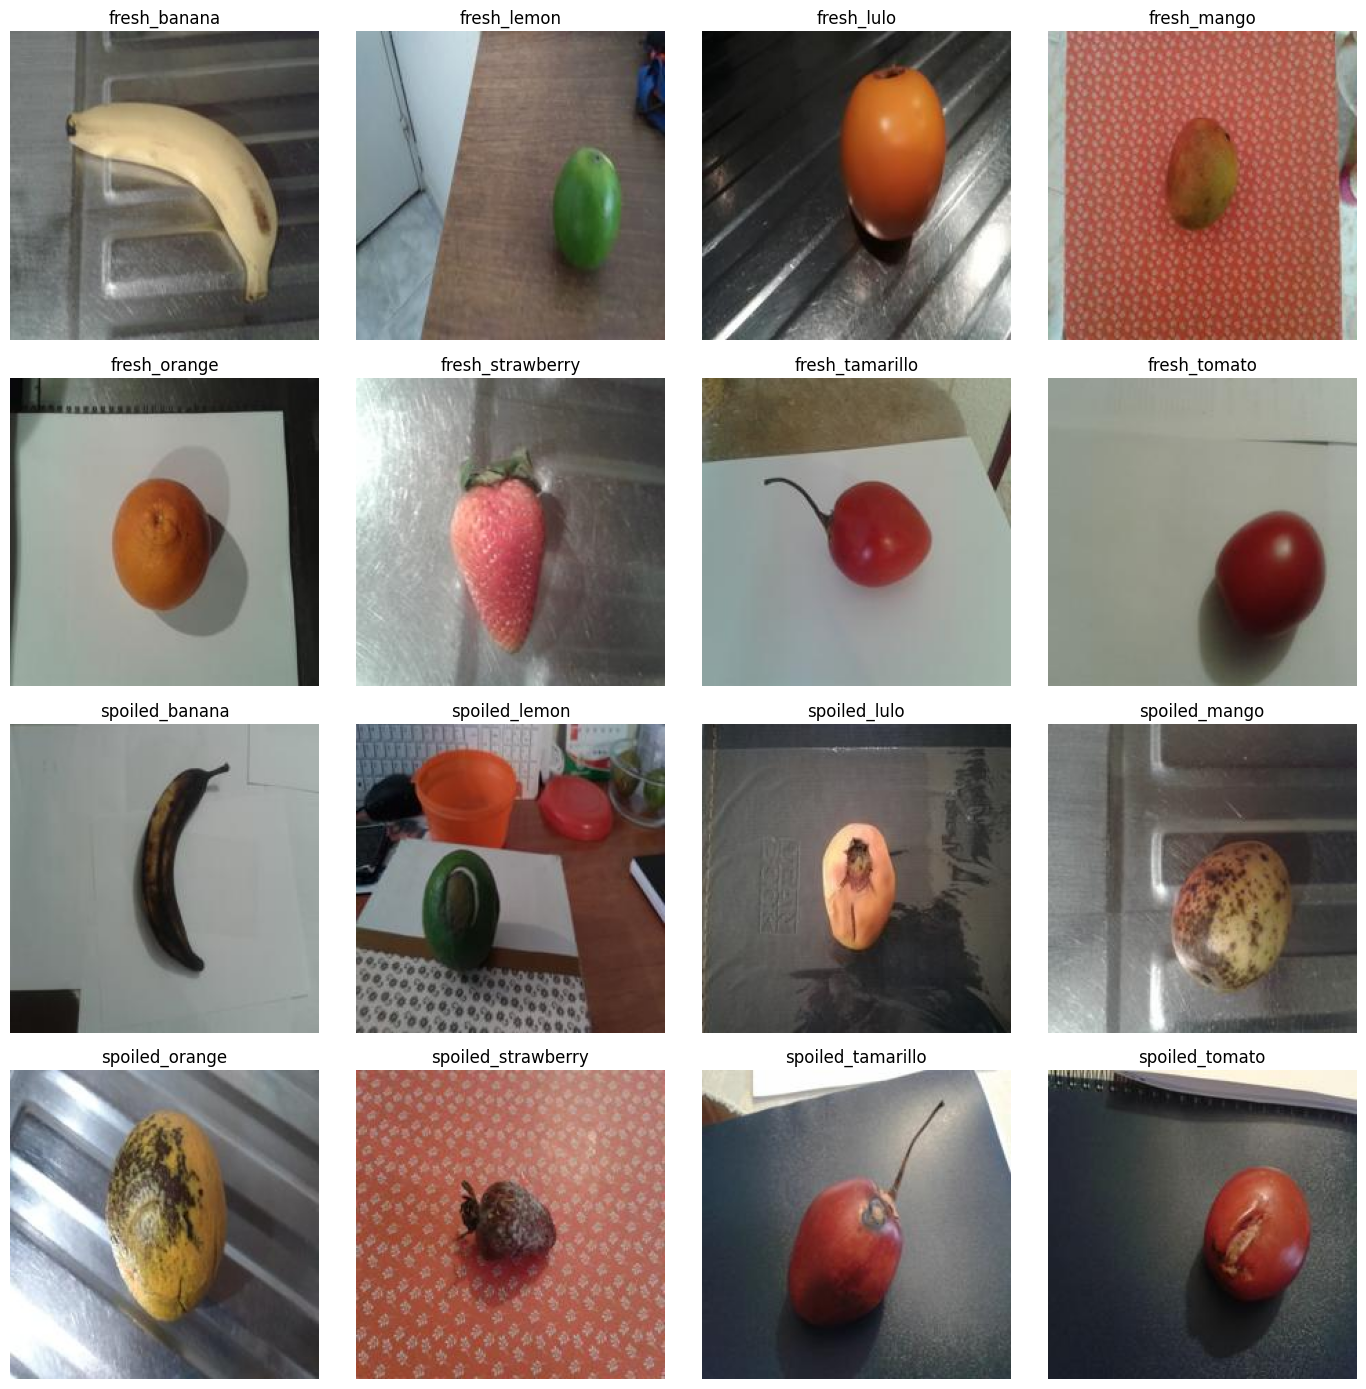

In [7]:
import matplotlib.pyplot as plt
import cv2
import random

class_dirs = sorted([d for d in organized_dir.iterdir() if d.is_dir()])

plt.figure(figsize=(14,14))
idx = 1
for cls in class_dirs[:16]:
    images = list(cls.glob("*.jpg"))
    img_path = random.choice(images)
    img = cv2.imread(str(img_path))[:,:,::-1]
    plt.subplot(4,4,idx)
    plt.title(cls.name)
    plt.imshow(img)
    plt.axis("off")
    idx += 1

plt.tight_layout()
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
import os

yolo_dir = Path("yolo_dataset")
for split in ["train","val","test"]:
    (yolo_dir/"images"/split).mkdir(parents=True, exist_ok=True)
    (yolo_dir/"labels"/split).mkdir(parents=True, exist_ok=True)

class_dirs = sorted([d for d in organized_dir.iterdir() if d.is_dir()])
class_names = [d.name for d in class_dirs]

images = []
labels = []
for idx, d in enumerate(class_dirs):
    for img in d.glob("*.jpg"):
        images.append(img)
        labels.append(idx)

X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, stratify=y_temp)

def convert(split_name, X, Y):
    for img, lab in zip(X,Y):
        new_path = yolo_dir/"images"/split_name/f"{img.stem}.jpg"
        shutil.copy(img, new_path)

        label_file = yolo_dir/"labels"/split_name/f"{img.stem}.txt"
        label_file.write_text(f"{lab} 0.5 0.5 1 1\n")

convert("train", X_train, y_train)
convert("val", X_val, y_val)
convert("test", X_test, y_test)

yaml_text = f"""
path: {yolo_dir}
train: images/train
val: images/val
test: images/test
nc: {len(class_names)}
names: {class_names}
"""

(yolo_dir/"data.yaml").write_text(yaml_text)

print("YOLO dataset created.")


YOLO dataset created.


In [9]:
from ultralytics import YOLO
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using:", device)

model = YOLO("yolov8n.pt")

results = model.train(
    data="yolo_dataset/data.yaml",
    epochs=20,
    imgsz=640,
    batch=16,
    name="fruit_quality_model",
    device=device
)

print("Training complete!")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Using: cuda
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=yolo_dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, kera

In [12]:
!ls /content/yolo_dataset/images/train


fresh_banana_0.jpg	  fresh_strawberry_413.jpg  spoiled_lulo_711.jpg
fresh_banana_100.jpg	  fresh_strawberry_414.jpg  spoiled_lulo_712.jpg
fresh_banana_102.jpg	  fresh_strawberry_416.jpg  spoiled_lulo_714.jpg
fresh_banana_105.jpg	  fresh_strawberry_418.jpg  spoiled_lulo_715.jpg
fresh_banana_106.jpg	  fresh_strawberry_419.jpg  spoiled_lulo_716.jpg
fresh_banana_107.jpg	  fresh_strawberry_41.jpg   spoiled_lulo_717.jpg
fresh_banana_109.jpg	  fresh_strawberry_420.jpg  spoiled_lulo_718.jpg
fresh_banana_10.jpg	  fresh_strawberry_421.jpg  spoiled_lulo_719.jpg
fresh_banana_110.jpg	  fresh_strawberry_422.jpg  spoiled_lulo_71.jpg
fresh_banana_112.jpg	  fresh_strawberry_423.jpg  spoiled_lulo_722.jpg
fresh_banana_113.jpg	  fresh_strawberry_424.jpg  spoiled_lulo_723.jpg
fresh_banana_114.jpg	  fresh_strawberry_426.jpg  spoiled_lulo_724.jpg
fresh_banana_115.jpg	  fresh_strawberry_427.jpg  spoiled_lulo_725.jpg
fresh_banana_116.jpg	  fresh_strawberry_428.jpg  spoiled_lulo_726.jpg
fresh_banana_118.jpg	  f

In [13]:
!ls /content/yolo_dataset/images/train | grep spoiled_tomato_978.jpg


spoiled_tomato_978.jpg



image 1/1 /content/yolo_dataset/images/train/spoiled_tomato_978.jpg: 640x640 1 spoiled_tomato, 12.3ms
Speed: 5.0ms preprocess, 12.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


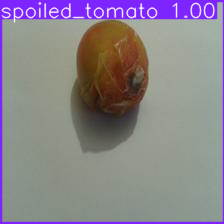

In [14]:
from ultralytics import YOLO

model = YOLO("runs/detect/fruit_quality_model/weights/best.pt")

img_path = "/content/yolo_dataset/images/train/spoiled_tomato_978.jpg"
results = model(img_path)

results[0].show()


In [15]:
results = model(img_path, save=True)



image 1/1 /content/yolo_dataset/images/train/spoiled_tomato_978.jpg: 640x640 1 spoiled_tomato, 10.0ms
Speed: 5.4ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict


In [16]:
model = YOLO("runs/detect/fruit_quality_model/weights/best.pt")
metrics = model.val()
print("Evaluation metrics:")
print(metrics)


Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,768 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 223.9±82.8 MB/s, size: 7.2 KB)
val: Scanning /content/yolo_dataset/labels/val.cache... 3216 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 3216/3216 2.3Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 201/201 6.0it/s 33.6s
                   all       3216       3216          1          1      0.995      0.995
          fresh_banana        201        201          1          1      0.995      0.995
           fresh_lemon        201        201          1          1      0.995      0.995
            fresh_lulo        201        201          1          1      0.995      0.995
           fresh_mango        201        201          1          1      0.995      0.995
          fresh_orange        201        201

In [17]:
test_imgs = list((yolo_dir/"images"/"test").glob("*.jpg"))[:8]

for img in test_imgs:
    print("Testing →", img.name)
    model.predict(source=str(img), conf=0.25, save=True)


Testing → spoiled_tamarillo_175.jpg

image 1/1 /content/yolo_dataset/images/test/spoiled_tamarillo_175.jpg: 640x640 1 spoiled_tamarillo, 25.5ms
Speed: 4.9ms preprocess, 25.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict2
Testing → spoiled_tomato_999.jpg

image 1/1 /content/yolo_dataset/images/test/spoiled_tomato_999.jpg: 640x640 1 spoiled_tomato, 19.9ms
Speed: 7.5ms preprocess, 19.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict2
Testing → spoiled_mango_451.jpg

image 1/1 /content/yolo_dataset/images/test/spoiled_mango_451.jpg: 640x640 1 spoiled_mango, 10.0ms
Speed: 8.5ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict2
Testing → fresh_tomato_633.jpg

image 1/1 /content/yolo_dataset/images/test/fresh_tomato_633.jpg: 640x640 1 fresh_tomato, 7.3ms
Speed: 3.0ms preprocess, 7.3m

In [23]:
print("model:", type(model))


model: <class 'ultralytics.models.yolo.model.YOLO'>


In [24]:
print("class_names:", class_names if 'class_names' in globals() else "NOT DEFINED")


class_names: ['fresh_banana', 'fresh_lemon', 'fresh_lulo', 'fresh_mango', 'fresh_orange', 'fresh_strawberry', 'fresh_tamarillo', 'fresh_tomato', 'spoiled_banana', 'spoiled_lemon', 'spoiled_lulo', 'spoiled_mango', 'spoiled_orange', 'spoiled_strawberry', 'spoiled_tamarillo', 'spoiled_tomato']


In [25]:
from pathlib import Path
test_folder = Path("yolo_dataset/images/test")
print("test folder exists:", test_folder.exists())
test_imgs = list(test_folder.glob("*.jpg")) + list(test_folder.glob("*.png"))
print("sample test images (first 8):", [str(p) for p in test_imgs[:8]])


test folder exists: True
sample test images (first 8): ['yolo_dataset/images/test/spoiled_tamarillo_175.jpg', 'yolo_dataset/images/test/spoiled_tomato_999.jpg', 'yolo_dataset/images/test/spoiled_mango_451.jpg', 'yolo_dataset/images/test/fresh_tomato_633.jpg', 'yolo_dataset/images/test/spoiled_lulo_398.jpg', 'yolo_dataset/images/test/fresh_mango_450.jpg', 'yolo_dataset/images/test/spoiled_lemon_251.jpg', 'yolo_dataset/images/test/fresh_strawberry_228.jpg']


In [26]:
img_path = str(test_imgs[0])  # replace index if needed
res = model.predict(source=img_path, conf=0.25, save=False)[0]
print("boxes count:", len(res.boxes))
if len(res.boxes)>0:
    b = res.boxes[0]
    print("box.xyxy:", b.xyxy[0].cpu().numpy())
    print("cls:", int(b.cls[0]), "conf:", float(b.conf[0]))
else:
    print("No detections on this image.")



image 1/1 /content/yolo_dataset/images/test/spoiled_tamarillo_175.jpg: 640x640 1 spoiled_tamarillo, 25.9ms
Speed: 8.3ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
boxes count: 1
box.xyxy: [          0    0.041528         224      223.92]
cls: 14 conf: 0.9968888163566589



image 1/1 /content/yolo_dataset/images/test/spoiled_tamarillo_175.jpg: 640x640 1 spoiled_tamarillo, 16.3ms
Speed: 7.5ms preprocess, 16.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
quality, conf, bbox: SPOILED 0.9968888163566589 (np.int64(0), np.int64(0), np.int64(224), np.int64(223))


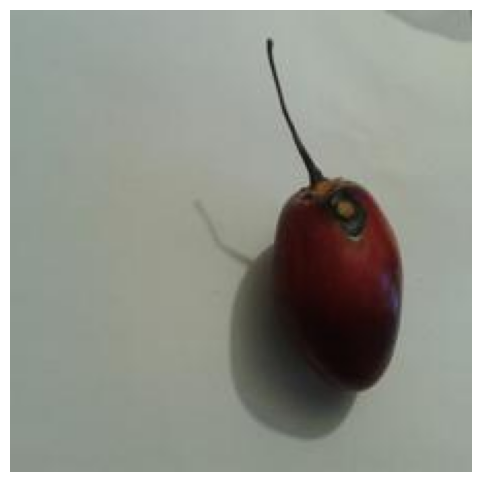

In [27]:
img, quality, conf, bbox = get_prediction(str(test_imgs[0]))
print("quality, conf, bbox:", quality, conf, bbox)
# show the image inline (quick)
import matplotlib.pyplot as plt, cv2
plt.figure(figsize=(6,6)); plt.imshow(img); plt.axis('off'); plt.show()


In [28]:
from pathlib import Path

test_imgs = list(Path("yolo_dataset/images/test").glob("*.jpg"))
print(test_imgs[:5])


[PosixPath('yolo_dataset/images/test/spoiled_tamarillo_175.jpg'), PosixPath('yolo_dataset/images/test/spoiled_tomato_999.jpg'), PosixPath('yolo_dataset/images/test/spoiled_mango_451.jpg'), PosixPath('yolo_dataset/images/test/fresh_tomato_633.jpg'), PosixPath('yolo_dataset/images/test/spoiled_lulo_398.jpg')]


In [30]:
for i, img in enumerate(test_imgs[:20]):
    res = model.predict(source=str(img), conf=0.25, save=False)[0]
    print(i, img.name, "detections:", len(res.boxes))



image 1/1 /content/yolo_dataset/images/test/spoiled_tamarillo_175.jpg: 640x640 1 spoiled_tamarillo, 11.9ms
Speed: 3.4ms preprocess, 11.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
0 spoiled_tamarillo_175.jpg detections: 1

image 1/1 /content/yolo_dataset/images/test/spoiled_tomato_999.jpg: 640x640 1 spoiled_tomato, 10.3ms
Speed: 2.6ms preprocess, 10.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
1 spoiled_tomato_999.jpg detections: 1

image 1/1 /content/yolo_dataset/images/test/spoiled_mango_451.jpg: 640x640 1 spoiled_mango, 7.3ms
Speed: 3.3ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
2 spoiled_mango_451.jpg detections: 1

image 1/1 /content/yolo_dataset/images/test/fresh_tomato_633.jpg: 640x640 1 fresh_tomato, 7.3ms
Speed: 3.0ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
3 fresh_tomato_633.jpg detections: 1

image 1/1 /content/yolo_dataset/images/test/spoiled

Auto-selected best candidates (path, confidence):
FRESH -> ('yolo_dataset/images/test/fresh_lemon_370.jpg', 0.9988786578178406)
SPOILED -> ('yolo_dataset/images/test/spoiled_tamarillo_270.jpg', 0.9990540146827698)


error: OpenCV(4.12.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - Layout of the output array img is incompatible with cv::Mat
>  - Layout of the output array img is incompatible with cv::Mat
>  - Expected Ptr<cv::UMat> for argument 'img'
>  - Expected Ptr<cv::UMat> for argument 'img'


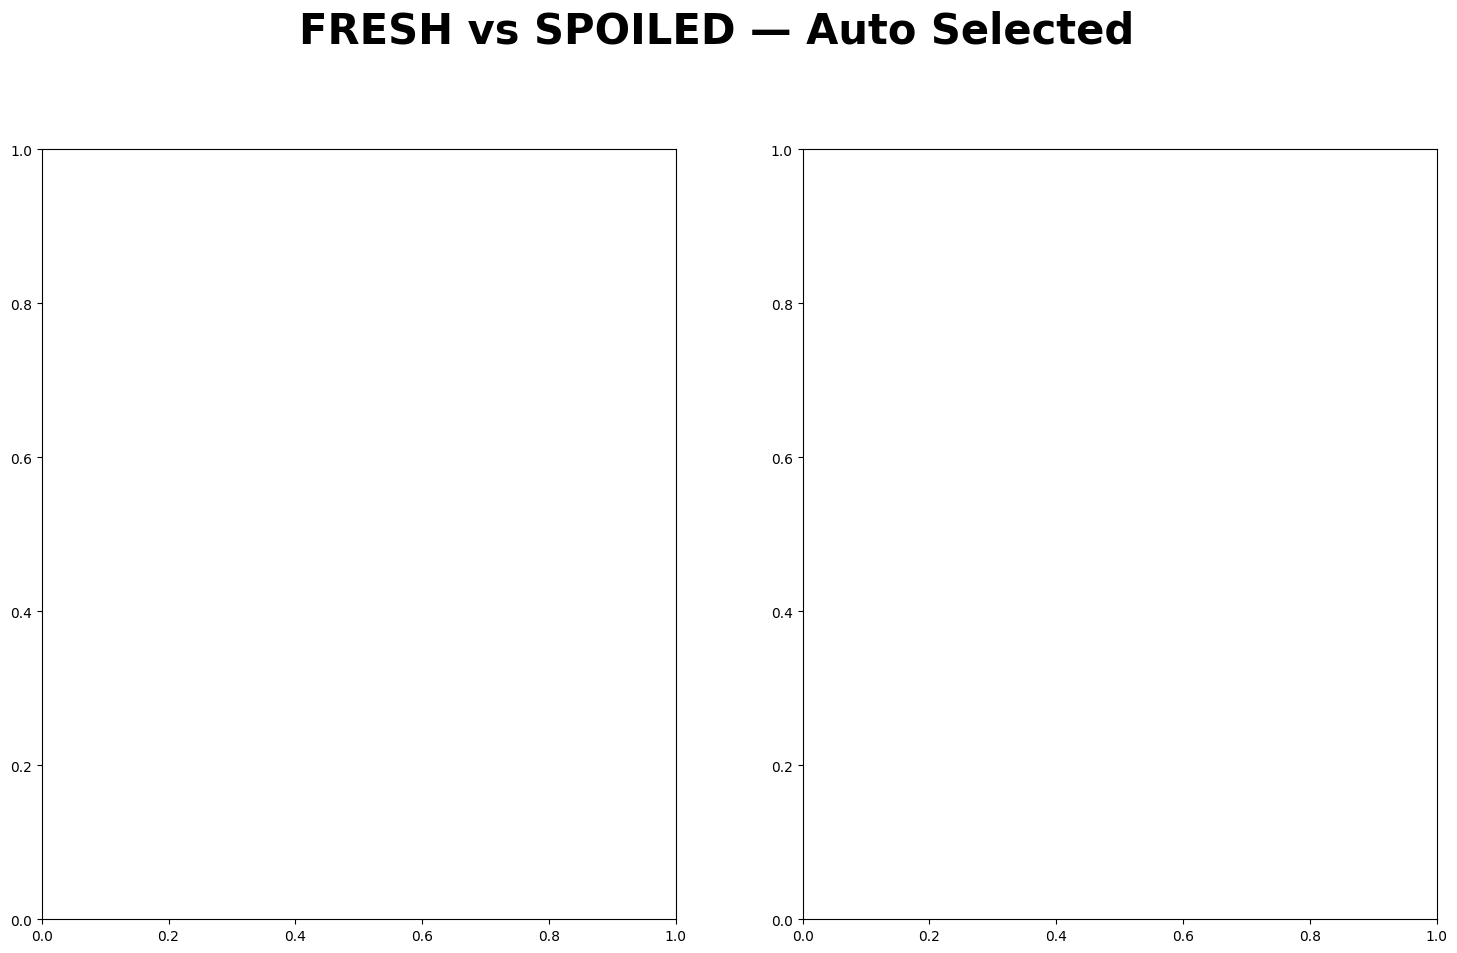

In [34]:
import numpy as np
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

def find_best_fresh_spoiled(test_folder="yolo_dataset/images/test", conf_thresh=0.05):
    test_imgs = list(Path(test_folder).glob("*.jpg")) + list(Path(test_folder).glob("*.png"))
    best = {"fresh": (None, 0.0), "spoiled": (None, 0.0)}  # (path, confidence)

    for img_path in test_imgs:
        res = model.predict(source=str(img_path), conf=conf_thresh, save=False, verbose=False)[0]
        for b in res.boxes:
            cls_idx = int(b.cls[0])
            cls_name = class_names[cls_idx]
            conf = float(b.conf[0])
            quality = "fresh" if "fresh" in cls_name else "spoiled"
            if conf > best[quality][1]:
                best[quality] = (str(img_path), conf)

    return best

def visualize_pair(path_fresh, conf_fresh, path_spoiled, conf_spoiled):
    # Load images
    img1 = cv2.imread(path_fresh)[:,:,::-1] if path_fresh else None
    img2 = cv2.imread(path_spoiled)[:,:,::-1] if path_spoiled else None

    fig, axes = plt.subplots(1, 2, figsize=(18, 10))
    fig.suptitle("FRESH vs SPOILED — Auto Selected", fontsize=30, fontweight='bold', y=1.02)

    # Left: Fresh
    if img1 is not None:
        res1 = model.predict(source=path_fresh, conf=0.01, save=False, verbose=False)[0]
        if len(res1.boxes) > 0:
            box = res1.boxes[0].xyxy[0].cpu().numpy().astype(int)
            x1,y1,x2,y2 = box
            color = (0,255,0)
            cv2.rectangle(img1, (x1,y1), (x2,y2), color, 5)
            cv2.putText(img1, f"FRESH ({conf_fresh*100:.1f}%)", (max(x1-5,5), max(y1-25,25)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.6, color, 4)
        axes[0].imshow(img1)
    else:
        axes[0].text(0.5,0.5,"No fresh image found", ha='center', va='center', fontsize=20)
    axes[0].set_title("FRESH", fontsize=20, fontweight='bold')
    axes[0].axis('off')

    # Right: Spoiled
    if img2 is not None:
        res2 = model.predict(source=path_spoiled, conf=0.01, save=False, verbose=False)[0]
        if len(res2.boxes) > 0:
            box = res2.boxes[0].xyxy[0].cpu().numpy().astype(int)
            x1,y1,x2,y2 = box
            color = (255,0,0)
            cv2.rectangle(img2, (x1,y1), (x2,y2), color, 5)
            cv2.putText(img2, f"SPOILED ({conf_spoiled*100:.1f}%)", (max(x1-5,5), max(y1-25,25)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.6, color, 4)
        axes[1].imshow(img2)
    else:
        axes[1].text(0.5,0.5,"No spoiled image found", ha='center', va='center', fontsize=20)
    axes[1].set_title("SPOILED", fontsize=20, fontweight='bold')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

# Run auto selection and visualize
best = find_best_fresh_spoiled()
print("Auto-selected best candidates (path, confidence):")
print("FRESH ->", best["fresh"])
print("SPOILED ->", best["spoiled"])

# If none found, increase search size or lower conf_thresh when calling find_best_fresh_spoiled
if best["fresh"][0] and best["spoiled"][0]:
    visualize_pair(best["fresh"][0], best["fresh"][1], best["spoiled"][0], best["spoiled"][1])
else:
    print("Could not find both fresh and spoiled images above threshold. Try lowering conf_thresh or check test set.")


Total test images found: 1584

Auto-selected best (path, confidence):
FRESH -> (PosixPath('yolo_dataset/images/test/fresh_lemon_370.jpg'), 0.9988786578178406)
SPOILED -> (PosixPath('yolo_dataset/images/test/spoiled_tamarillo_270.jpg'), 0.9990540146827698)

Top 5 fresh candidates:
  fresh_lemon_370.jpg | class: fresh_lemon | conf: 0.999
  fresh_lemon_889.jpg | class: fresh_lemon | conf: 0.999
  fresh_lemon_645.jpg | class: fresh_lemon | conf: 0.999
  fresh_lemon_415.jpg | class: fresh_lemon | conf: 0.999
  fresh_tomato_612.jpg | class: fresh_tomato | conf: 0.999

Top 5 spoiled candidates:
  spoiled_tamarillo_270.jpg | class: spoiled_tamarillo | conf: 0.999
  spoiled_tamarillo_800.jpg | class: spoiled_tamarillo | conf: 0.999
  spoiled_lulo_376.jpg | class: spoiled_lulo | conf: 0.999
  spoiled_mango_145.jpg | class: spoiled_mango | conf: 0.999
  spoiled_lulo_877.jpg | class: spoiled_lulo | conf: 0.999

--- FRESH candidate ---
Path: yolo_dataset/images/test/fresh_lemon_370.jpg
Exists: True

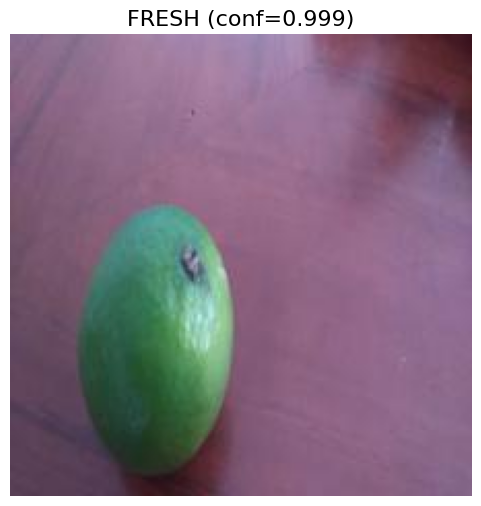

Detections returned: 1
  Box 0: xyxy=[  0   0 223 223], class=fresh_lemon, conf=0.999

--- SPOILED candidate ---
Path: yolo_dataset/images/test/spoiled_tamarillo_270.jpg
Exists: True
cv2.imread returned: shape (224, 224, 3)


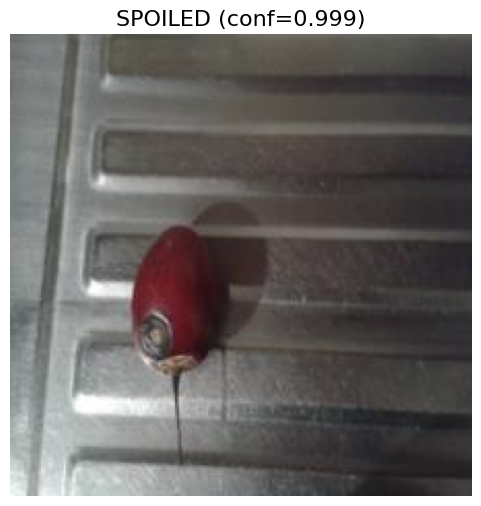

Detections returned: 1
  Box 0: xyxy=[  0   0 223 224], class=spoiled_tamarillo, conf=0.999

If images displayed above, auto-select visualization should work. If you want the side-by-side view, run compare_fruits(best['fresh'][0], best['spoiled'][0])


In [35]:
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Helper: gather test images
test_folder = Path("yolo_dataset/images/test")
test_imgs = sorted(list(test_folder.glob("*.jpg")) + list(test_folder.glob("*.png")))
print("Total test images found:", len(test_imgs))
if len(test_imgs) == 0:
    raise SystemExit("No test images found at yolo_dataset/images/test — check earlier steps.")

# Find top candidates per quality
best = {"fresh": (None, 0.0), "spoiled": (None, 0.0)}
for p in test_imgs:
    res = model.predict(source=str(p), conf=0.01, save=False, verbose=False)[0]
    for b in res.boxes:
        cls_idx = int(b.cls[0])
        cls_name = class_names[cls_idx] if 'class_names' in globals() else str(cls_idx)
        conf = float(b.conf[0])
        quality = "fresh" if "fresh" in cls_name else "spoiled"
        if conf > best[quality][1]:
            best[quality] = (p, conf)

print("\nAuto-selected best (path, confidence):")
print("FRESH ->", best["fresh"])
print("SPOILED ->", best["spoiled"])

# Also print top 5 candidates for each quality for extra info
cands = {"fresh": [], "spoiled": []}
for p in test_imgs:
    res = model.predict(source=str(p), conf=0.01, save=False, verbose=False)[0]
    for b in res.boxes:
        cls_idx = int(b.cls[0])
        cls_name = class_names[cls_idx] if 'class_names' in globals() else str(cls_idx)
        conf = float(b.conf[0])
        quality = "fresh" if "fresh" in cls_name else "spoiled"
        cands[quality].append((p, cls_name, conf))

for q in ["fresh","spoiled"]:
    cands[q].sort(key=lambda x: x[2], reverse=True)
    print(f"\nTop 5 {q} candidates:")
    for item in cands[q][:5]:
        print(" ", item[0].name, "| class:", item[1], "| conf:", f"{item[2]:.3f}")

# Function to check & display specific path
def check_and_show(path_tuple, side_name):
    p, conf = path_tuple
    print(f"\n--- {side_name} candidate ---")
    print("Path:", p)
    print("Exists:", p.exists() if p is not None else False)
    if p is None or not p.exists():
        print("File missing — cannot display.")
        return False

    # Try cv2.imread
    img_cv = cv2.imread(str(p))
    print("cv2.imread returned:", None if img_cv is None else f"shape {img_cv.shape}")
    if img_cv is None:
        # Try PIL fallback
        try:
            from PIL import Image
            pil_img = Image.open(str(p)).convert("RGB")
            arr = np.array(pil_img)
            print("PIL loaded image shape:", arr.shape)
            img = arr
        except Exception as e:
            print("PIL failed to load image:", e)
            return False
    else:
        img = img_cv[:,:,::-1]  # BGR -> RGB

    # Show image
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.title(f"{side_name} (conf={conf:.3f})", fontsize=16)
    plt.axis('off')
    plt.show()

    # Print detection boxes from model (again)
    res = model.predict(source=str(p), conf=0.01, save=False, verbose=False)[0]
    print("Detections returned:", len(res.boxes))
    for i,bb in enumerate(res.boxes):
        xyxy = bb.xyxy[0].cpu().numpy()
        cls_idx = int(bb.cls[0])
        cls_name = class_names[cls_idx] if 'class_names' in globals() else cls_idx
        confv = float(bb.conf[0])
        print(f"  Box {i}: xyxy={xyxy.astype(int)}, class={cls_name}, conf={confv:.3f}")

    return True

# Check and show both
ok_f = check_and_show(best["fresh"], "FRESH")
ok_s = check_and_show(best["spoiled"], "SPOILED")

if not ok_f or not ok_s:
    print("\nOne or both images could not be loaded/displayed. Copy the printed messages above and paste here.")
else:
    print("\nIf images displayed above, auto-select visualization should work. If you want the side-by-side view, run compare_fruits(best['fresh'][0], best['spoiled'][0])")


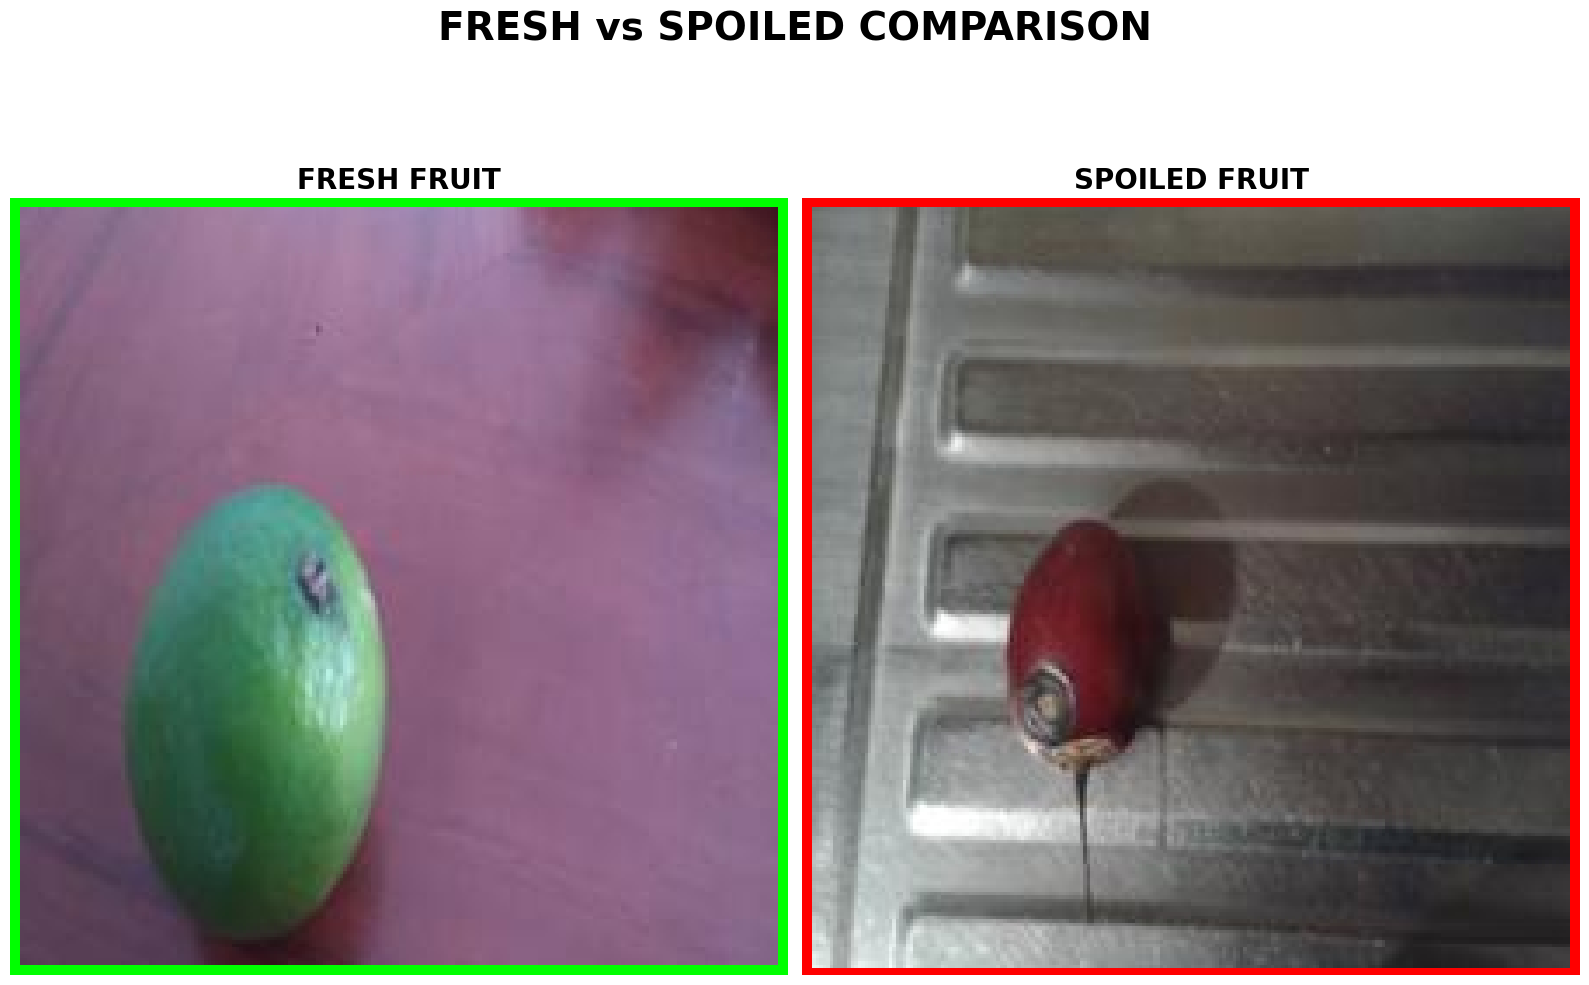

In [36]:
compare_fruits(str(best["fresh"][0]), str(best["spoiled"][0]))
